Q:1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.
Answer: Total multiplication: n*m*k, Total additions: n*m*(k-1)



Q:2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:

import time
import numpy as np
import random

# Matrix dimensions
n, k, m = 200, 300, 150  # Example sizes

# Create random matrices
A = [[random.randint(0, 10) for _ in range(k)] for _ in range(n)]
B = [[random.randint(0, 10) for _ in range(m)] for _ in range(k)]

# ----------------------------
# List of lists multiplication
# ----------------------------
start = time.time()

result_list = [[0] * m for _ in range(n)]
for i in range(n):
    for j in range(m):
        for t in range(k):  # multiply across shared dimension
            result_list[i][j] += A[i][t] * B[t][j]

end = time.time()
list_time = end - start
print(f"List of lists time: {list_time:.6f} seconds")

# ----------------------------
# NumPy multiplication
# ----------------------------
A_np = np.array(A)
B_np = np.array(B)

start = time.time()
result_np = np.dot(A_np, B_np)  # Shape will be (n, m)
end = time.time()
numpy_time = end - start
print(f"NumPy time: {numpy_time:.6f} seconds")

# ----------------------------
# Which is faster?
# ----------------------------
if numpy_time < list_time:
    print("NumPy is faster.")
else:
    print("List of lists is faster.")


List of lists time: 7.828058 seconds
NumPy time: 0.033470 seconds
NumPy is faster.


Q:3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [2]:

import random

arr = [random.randint(0, 1000) for _ in range(10001)]

# Naive method (repeated max removals)
def median_naive(arr):
    arr_copy = arr.copy()
    n = len(arr_copy)
    for _ in range(n // 2):
        arr_copy.remove(max(arr_copy))
    return max(arr_copy)

# Using sort
def median_sort(arr):
    arr_sorted = sorted(arr)
    n = len(arr_sorted)
    if n % 2 == 1:
        return arr_sorted[n // 2]
    else:
        return (arr_sorted[n//2 - 1] + arr_sorted[n//2]) / 2

# Using numpy
def median_numpy(arr):
    return np.median(arr)

# Timing
import time

start = time.time()
median1 = median_sort(arr)
end = time.time()
print(f"Sort Method Time: {end - start:.6f} seconds")

start = time.time()
median2 = median_numpy(arr)
end = time.time()
print(f"Numpy Median Time: {end - start:.6f} seconds")




Sort Method Time: 0.002088 seconds
Numpy Median Time: 0.006022 seconds


Q:4 What is the gradient of the following function with respect to x and y? (x**2)*y + (y**3)*sin(x)
Answer: gradient = (df/dy,df/dx) = (2*x*y + y**3*cos(x) , x**2 + 3*y**2*sin(x))


Question:7

In [3]:
# Example nested dictionary
student_db = {
    2022: {
        "Branch 1": [
            {"roll_number": 1, "name": "Alice", "marks": {"Maths": 100, "English": 70}},
            {"roll_number": 2, "name": "Bob", "marks": {"Maths": 80, "English": 85}},
        ],
        "Branch 2": [
            {"roll_number": 3, "name": "Charlie", "marks": {"Maths": 75, "English": 90}}
        ]
    },
    2023: {
        "Branch 1": [
            {"roll_number": 4, "name": "David", "marks": {"Maths": 88, "English": 78}}
        ],
        "Branch 2": []
    },
    2024: {
        "Branch 1": [],
        "Branch 2": []
    },
    2025: {
        "Branch 1": [],
        "Branch 2": []
    }
}

# Examples
print(student_db[2022]["Branch 2"][0]["name"])
print(student_db[2022]["Branch 2"][0]["marks"]["Maths"])

print(student_db[2023]["Branch 1"][0]["name"])
print(student_db[2023]["Branch 1"][0]["marks"]["English"])


Charlie
75
David
78


Q:8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [4]:

class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks  # dictionary: subject -> marks

    def __repr__(self):
        return f"Student(roll={self.roll_number}, name={self.name}, marks={self.marks})"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(name={self.name}, students={self.students})"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = {}

    def add_branch(self, branch):
        self.branches[branch.name] = branch

    def __repr__(self):
        return f"Year({self.year}, branches={self.branches})"

# Create example database
database = []

# Year 2022
year2022 = Year(2022)
branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(Student(1, "Alice", {"Maths": 100, "English": 70}))
branch1_2022.add_student(Student(2, "Bob", {"Maths": 80, "English": 85}))

branch2_2022 = Branch("Branch 2")
branch2_2022.add_student(Student(3, "Charlie", {"Maths": 75, "English": 90}))

year2022.add_branch(branch1_2022)
year2022.add_branch(branch2_2022)

# Year 2023
year2023 = Year(2023)
branch1_2023 = Branch("Branch 1")
branch1_2023.add_student(Student(4, "David", {"Maths": 88, "English": 78}))
branch2_2023 = Branch("Branch 2")
year2023.add_branch(branch1_2023)
year2023.add_branch(branch2_2023)

# Adding years to database
database.append(year2022)
database.append(year2023)

# Example
print(database[0].branches["Branch 1"].students[0].name)  # Output: Alice
print(database[0].branches["Branch 2"].students[0].marks["English"])  # Output: 90


Alice
90


Question:9

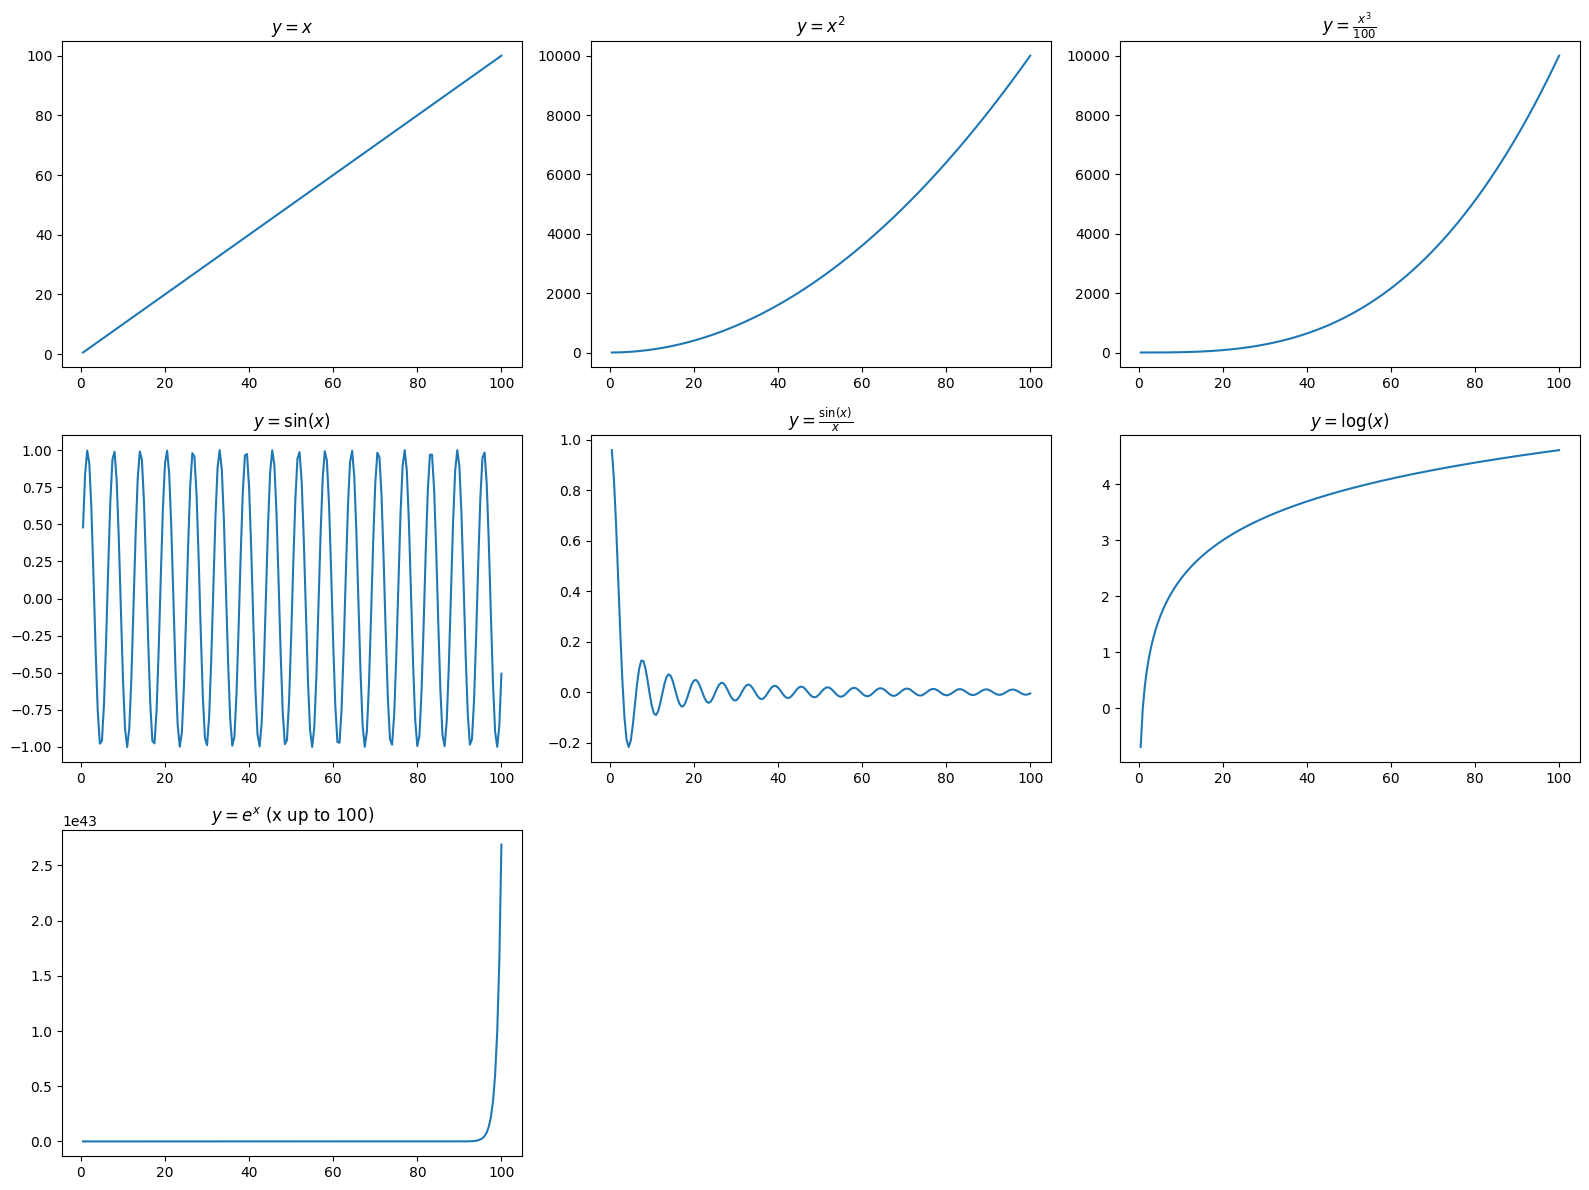

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)  # x values from 0.5 to 100 in steps of 0.5

y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(16, 12))
plt.subplot(3, 3, 1)
plt.plot(x, y1)
plt.title(r'$y = x$')

plt.subplot(3, 3, 2)
plt.plot(x, y2)
plt.title(r'$y = x^2$')

plt.subplot(3, 3, 3)
plt.plot(x, y3)
plt.title(r'$y = \frac{x^3}{100}$')

plt.subplot(3, 3, 4)
plt.plot(x, y4)
plt.title(r'$y = \sin(x)$')

plt.subplot(3, 3, 5)
plt.plot(x, y5)
plt.title(r'$y = \frac{\sin(x)}{x}$')

plt.subplot(3, 3, 6)
plt.plot(x, y6)
plt.title(r'$y = \log(x)$')

plt.subplot(3, 3, 7)
plt.plot(x, y7)
plt.title(r'$y = e^x$ (x up to 100)')

plt.tight_layout()
plt.show()


Question:12

In [7]:
import numpy as np

# A 2D array (matrix) with shape (2, 3)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])

# A 1D array (vector) with shape (3,)
vector = np.array([10, 20, 30])

# Add the vector to each row of the matrix using broadcasting
result = matrix + vector

print("Matrix:")
print(matrix)
print("\nVector:")
print(vector)
print("\nResult of broadcasting addition:")
print(result)

Matrix:
[[1 2 3]
 [4 5 6]]

Vector:
[10 20 30]

Result of broadcasting addition:
[[11 22 33]
 [14 25 36]]


Question:13

In [6]:

import numpy as np

def my_argmin(arr):
    """
    Compute the index of the minimum element in a numpy array.
    Parameters:
        arr (np.ndarray): 1D numpy array
    Returns:
        int: index of the minimum element
    """
    min_idx = 0
    min_val = arr[0]
    for idx, val in enumerate(arr):
        if val < min_val:
            min_val = val
            min_idx = idx
    return min_idx

# Example usage
arr = np.array([5, 2, 8, -1, 3])

print("Input array:", arr)
print("Custom argmin:", my_argmin(arr))
print("NumPy argmin verification:", np.argmin(arr))


Input array: [ 5  2  8 -1  3]
Custom argmin: 3
NumPy argmin verification: 3
